In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="cartopy")


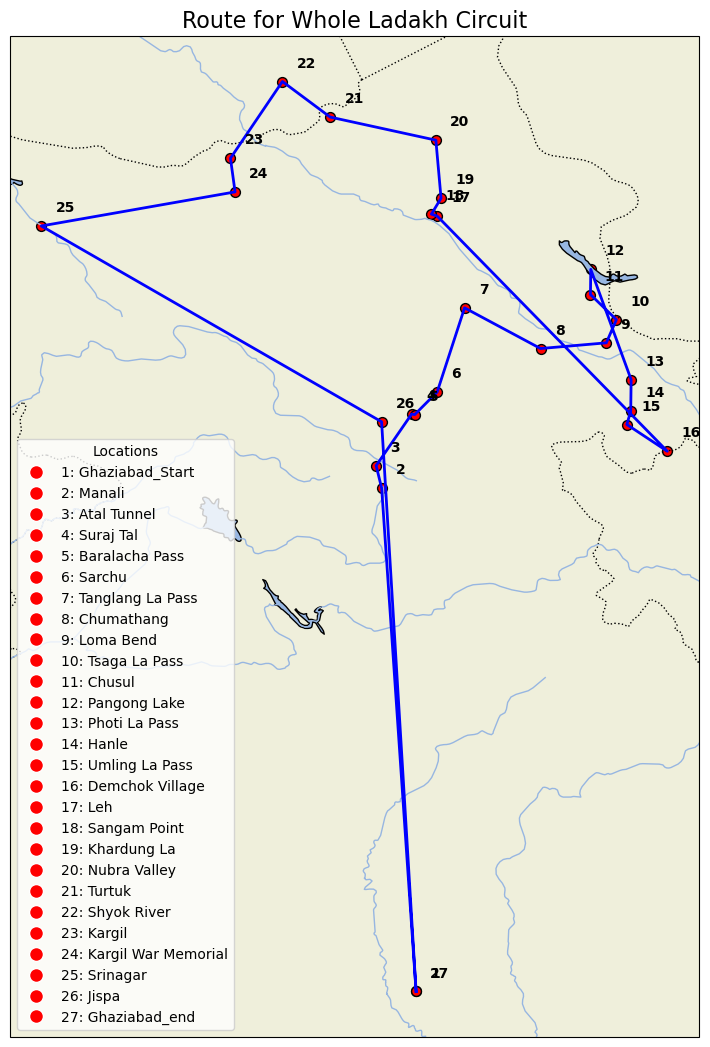

In [11]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Point, LineString
import numpy as np

# Coordinates for each location
loc = {
    "Ghaziabad_Start":(28.7076, 77.4294),
    "Manali": (32.2426, 77.1876),
    "Atal Tunnel": (32.4005, 77.1488),
    "Suraj Tal": (32.7628, 77.3981),
    "Baralacha Pass": (32.7592, 77.4197),
    "Sarchu": (32.9175, 77.5773),
    "Tanglang La Pass": (33.5087, 77.7698),
    "Chumathang": (33.2230, 78.3033),
    "Loma Bend": (33.2630, 78.7653),
    "Tsaga La Pass": (33.4258, 78.8359),    
    "Chusul": (33.6021, 78.6539),
    "Pangong Lake": (33.7791, 78.6561),
    "Photi La Pass": (33.0048, 78.9395),    
    "Hanle": (32.7834, 78.9367),
    "Umling La Pass": (32.6894, 78.9094),
    "Demchok Village": (32.5015, 79.1937),  
    "Leh": (34.1534, 77.5773),   
    "Sangam Point": (34.1668, 77.5369),
    "Khardung La": (34.2787, 77.6046),  
    "Nubra Valley": (34.6863, 77.5682),
    "Turtuk": (34.8484, 76.826),
    "Shyok River": (35.0983, 76.4905), 
    "Kargil": (34.5592, 76.1257),
    "Kargil War Memorial": (34.3230, 76.1581),
    "Srinagar": (34.0837, 74.7973),
    "Jispa":(32.7085, 77.1871),
    "Ghaziabad_End": (28.7076, 77.4294),

}

# Extract latitudes and longitudes
lats, longs = zip(*loc.values())
loc_names = list(loc.keys())

# Create the route LineString
points = np.array([loc[loc_name] for loc_name in loc_names])
route_lats, route_longs = zip(*points)

# Plotting
fig, ax = plt.subplots(figsize=(10, 13), subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.RIVERS)

# Plot the route
ax.plot(route_longs, route_lats, color='blue', linewidth=2, label='Trip Route', transform=ccrs.PlateCarree())

# Plot the points
ax.scatter(longs, lats, color='red', s=50, edgecolor='black', transform=ccrs.PlateCarree())

# Add the location numbers on the plot
for i, (loc_name, (lat, long)) in enumerate(loc.items(), start=1):
    ax.text(long + 0.1, lat + 0.1, str(i), fontsize=10, fontweight='bold', transform=ccrs.PlateCarree())

# Create a legend with location names
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, linestyle='') for _ in loc]
labels = [f'{i}: {name}' for i, (name, _) in enumerate(loc.items(), start=1)]
ax.legend(handles=handles, labels=labels, title='Locations', fontsize=10, loc='best')

# Set title
ax.set_title("Route for Whole Ladakh Circuit", fontsize=16)

plt.show()


In [13]:
from geopy.distance import geodesic

# Coordinates for each location
loc = {
    "Ghaziabad_Start": (28.7076, 77.4294),
    "Manali": (32.2426, 77.1876),
    "Atal Tunnel": (32.4005, 77.1488),
    "Suraj Tal": (32.7628, 77.3981),
    "Baralacha Pass": (32.7592, 77.4197),
    "Sarchu": (32.9175, 77.5773),
    "Tanglang La Pass": (33.5087, 77.7698),
    "Chumathang": (33.2230, 78.3033),
    "Loma Bend": (33.2630, 78.7653),
    "Tsaga La Pass": (33.4258, 78.8359),
    "Chusul": (33.6021, 78.6539),
    "Pangong Lake": (33.7791, 78.6561),
    "Photi La Pass": (33.0048, 78.9395),
    "Hanle": (32.7834, 78.9367),
    "Umling La Pass": (32.6894, 78.9094),
    "Demchok Village": (32.5015, 79.1937),
    "Leh": (34.1534, 77.5773),
    "Sangam Point": (34.1668, 77.5369),
    "Khardung La": (34.2787, 77.6046),
    "Nubra Valley": (34.6863, 77.5682),
    "Turtuk": (34.8484, 76.826),
    "Shyok River": (35.0983, 76.4905),
    "Kargil": (34.5592, 76.1257),
    "Kargil War Memorial": (34.3230, 76.1581),
    "Srinagar": (34.0837, 74.7973),
    "Jispa": (32.7085, 77.1871),
    "Ghaziabad_End": (28.7076, 77.4294),

}

# Compute the total distance
total_distance = 0.0
locations = list(loc.values())

for i in range(len(locations) - 1):
    total_distance += geodesic(locations[i], locations[i + 1]).kilometers

print(f"Total distance covered: {total_distance:.2f} km")


Total distance covered: 2224.57 km
